In [1]:
import pandas as pd
import gseapy as gp
from gseapy import barplot, dotplot
import numpy as np
import matplotlib.pyplot as plt
from itables import show
from ipywidgets import interact

In [2]:
def select_gene_DE_UP(data):   
    gene_list_up =[]
    data = pd.DataFrame.dropna(data)

    for i,j in enumerate(data["symbol"]):
        if (data.iloc[i,2] > 1) & (data.iloc[i,5] < 0.05):
            gene_list_up.append(j)
        else :
            continue
    return gene_list_up

def select_gene_DE_DOWN(data):   
    gene_list_down =[]
    data = pd.DataFrame.dropna(data)

    for i,j in enumerate(data["symbol"]):
        if (data.iloc[i,2] < -1) & (data.iloc[i,5] < 0.05):
            gene_list_down.append(j)
        else :
            continue
    return gene_list_down

In [3]:
#gp.get_library_name()

In [4]:
def enrichment_up(data):
    gene_up = select_gene_DE_UP(data)
    enrichment_up = gp.enrichr(gene_list=gene_up,
                 gene_sets=['GO_Biological_Process_2021','GO_Molecular_Function_2021','GO_Cellular_Component_2021'],
                 organism='human',
                 outdir=None,
                )
    return enrichment_up
    
def enrichment_down(data):
    gene_down = select_gene_DE_DOWN(data)
    enrichment_down = gp.enrichr(gene_list=gene_down,
                 gene_sets=['GO_Biological_Process_2021','GO_Molecular_Function_2021','GO_Cellular_Component_2021'],
                 organism='human',
                 outdir=None,
                )
    return enrichment_down

def enrichment_merged(data):
    gene_down = select_gene_DE_DOWN(data)
    gene_up = select_gene_DE_UP(data)
    genes = gene_down + gene_up
    enrichment_merged = gp.enrichr(gene_list=genes,
                                   gene_sets=['GO_Biological_Process_2021','GO_Molecular_Function_2021','GO_Cellular_Component_2021'],
                 organism='human',
                 outdir=None,
                            )
    return enrichment_merged

## Transcriptomic J2/J0

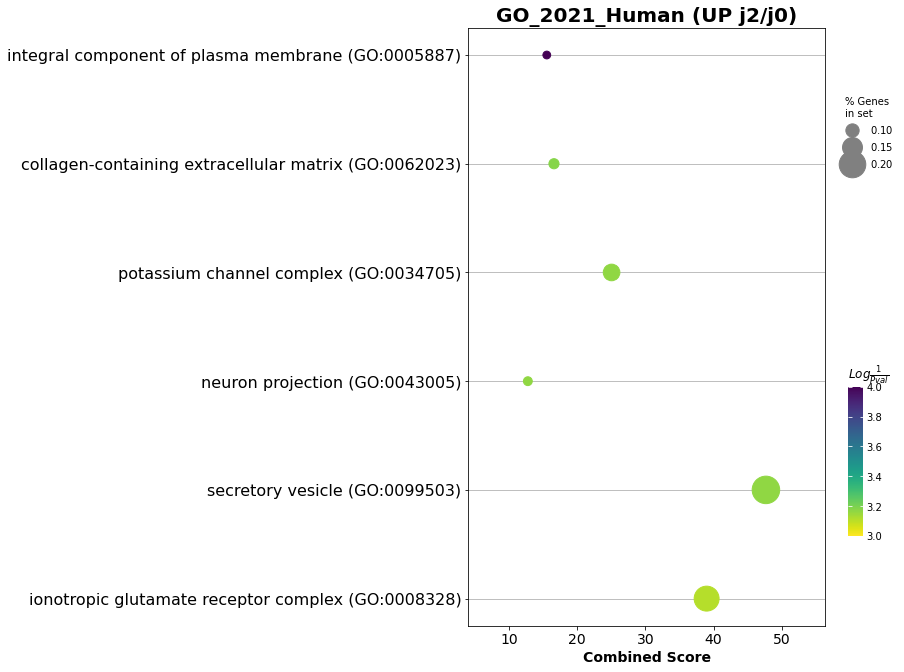

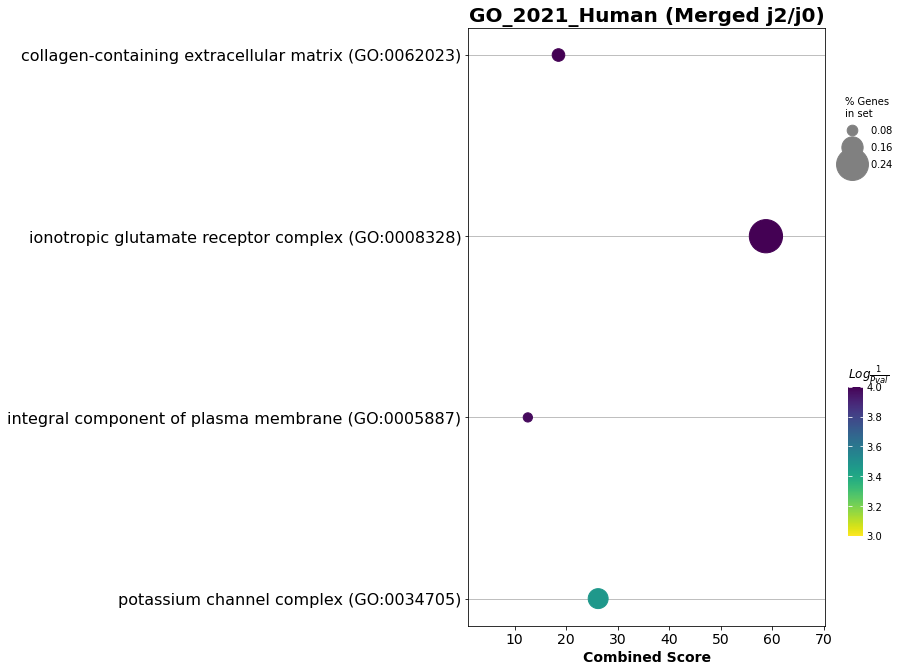

In [5]:
data1 = pd.read_csv("Transcriptomic/all_de_j2_vs_j0_allgenes.txt", sep='\t')

enrichment_up1 = enrichment_up(data1)
enrichment_down1 = enrichment_down(data1)
enrichment_merged1 = enrichment_merged(data1)

ax1 = dotplot(enrichment_up1.res2d, title='GO_2021_Human (UP j2/j0)',cmap='viridis_r', size=50, figsize=(8,11))
ax2 = dotplot(enrichment_down1.res2d, title='GO_2021_Human (DOWN j2/j0)',cmap='viridis_r', size=50, figsize=(8,11))
ax3 = dotplot(enrichment_merged1.res2d, title='GO_2021_Human (Merged j2/j0)',cmap='viridis_r',size=50, figsize=(8,11))

In [6]:
def table_transcrit(DE):
    if DE == 'UP':
        print("Enrichment up J2/J0 :")
        return show(enrichment_up1.results)
    elif DE == 'DOWN':
        print("Enrichment down J2/J0 :")
        return show(enrichment_down1.results)
    elif DE == 'UP&DOWN':
        print("Enrichment up&down J2/J0 :")
        return show(enrichment_merged1.results)

interact(table_transcrit, DE =['UP','DOWN', 'UP&DOWN'])

interactive(children=(Dropdown(description='DE', options=('UP', 'DOWN', 'UP&DOWN'), value='UP'), Output()), _d…

<function __main__.table_transcrit(DE)>

## Transcriptomic J4/J0

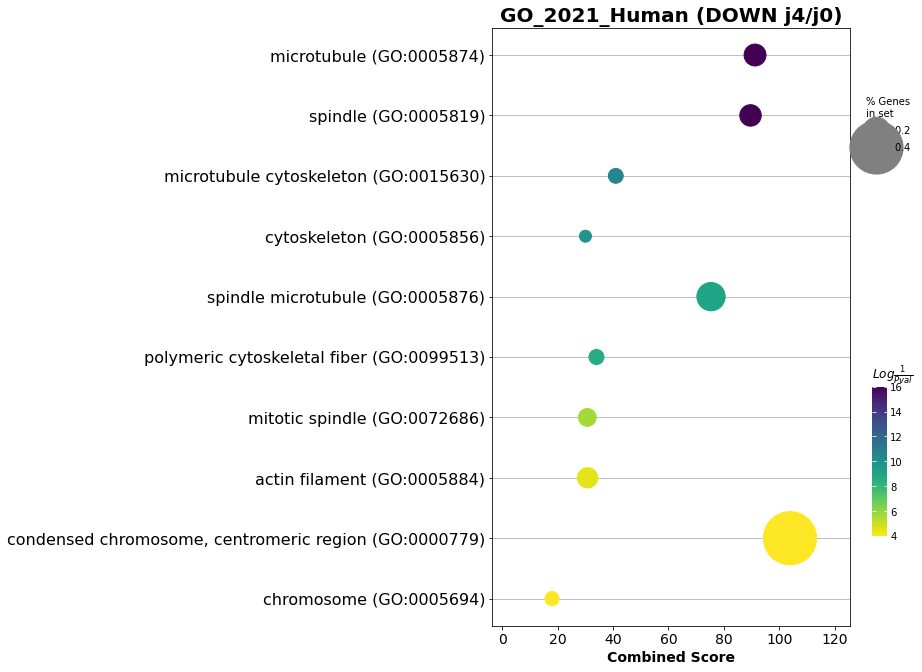

In [7]:
data2 = pd.read_csv("Transcriptomic/all_de_j4_vs_j0_allgenes.txt", sep='\t')

enrichment_up2 = enrichment_up(data2)
enrichment_down2 = enrichment_down(data2)
enrichment_merged2 = enrichment_merged(data2)
try :
    ax4 = dotplot(enrichment_up2.res2d, title='GO_2021_Human (UP j4/j0)',cmap='viridis_r', size=50, figsize=(8,11))
except :
    pass
try :    
    ax5 = dotplot(enrichment_down2.res2d, title='GO_2021_Human (DOWN j4/j0)',cmap='viridis_r', size=50, figsize=(8,11))
except :
    pass
    
try :
    ax6 = dotplot(enrichment_merged2.res2d, title='GO_2021_Human (Merged j4/j0)',cmap='viridis_r',size=50, figsize=(8,11))
except :
    pass

In [8]:
def table_transcrit(DE):
    if DE == 'UP':
        print("Enrichment up J4/J0 :")
        return show(enrichment_up2.results)
    elif DE == 'DOWN':
        print("Enrichment down J4/J0 :")
        return show(enrichment_down2.results)
    elif DE == 'UP&DOWN':
        print("Enrichment up&down J4/J0 :")
        return show(enrichment_merged2.results)

interact(table_transcrit, DE =['UP','DOWN', 'UP&DOWN'])

interactive(children=(Dropdown(description='DE', options=('UP', 'DOWN', 'UP&DOWN'), value='UP'), Output()), _d…

<function __main__.table_transcrit(DE)>

## Transcriptomic J4/J2

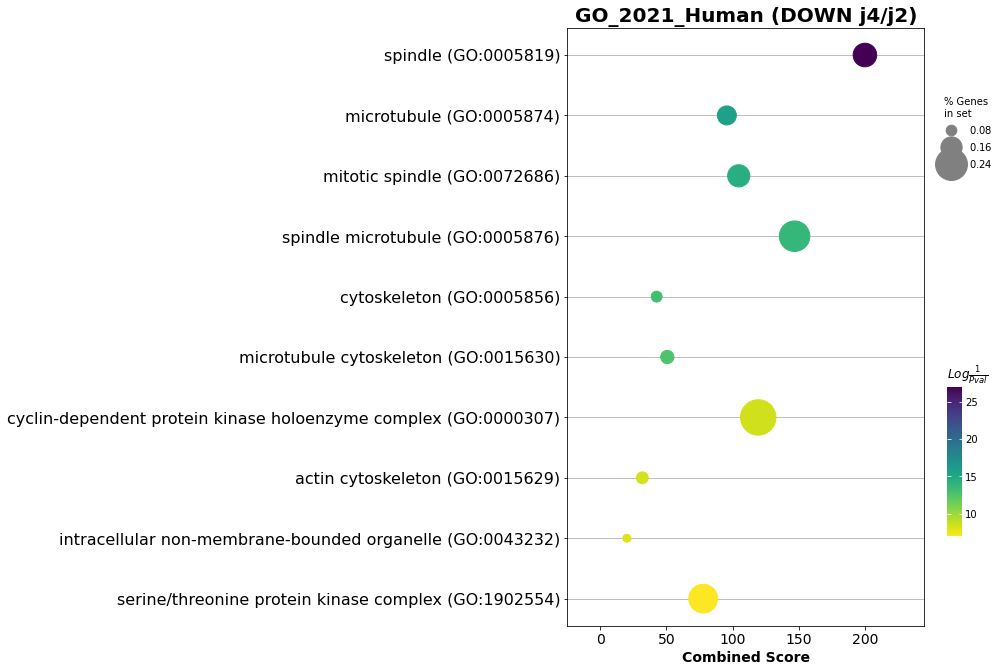

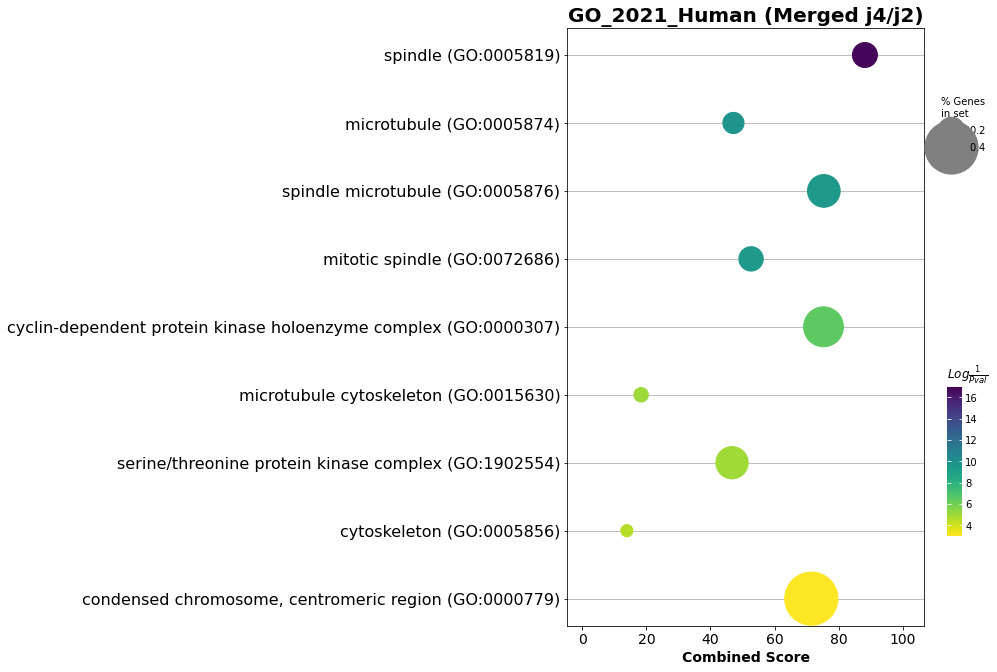

In [9]:
data3 = pd.read_csv("Transcriptomic/all_de_j4_vs_j2_allgenes.txt", sep='\t')

enrichment_up3 = enrichment_up(data3)
enrichment_down3 = enrichment_down(data3)
enrichment_merged3 = enrichment_merged(data3)

try :
    ax7 = dotplot(enrichment_up3.res2d, title='GO_2021_Human (UP j4/j2)',cmap='viridis_r', size=50, figsize=(8,11))
except :
    pass
try :
    ax8 = dotplot(enrichment_down3.res2d, title='GO_2021_Human (DOWN j4/j2)',cmap='viridis_r', size=50, figsize=(8,11))
except :
    pass
try :
    ax9 = dotplot(enrichment_merged3.res2d, title='GO_2021_Human (Merged j4/j2)',cmap='viridis_r',size=50, figsize=(8,11))
except :
    pass

In [10]:
def table_transcrit(DE):
    if DE == 'UP':
        print("Enrichment up J4/J2 :")
        return show(enrichment_up3.results)
    elif DE == 'DOWN':
        print("Enrichment down J4/J2 :")
        return show(enrichment_down3.results)
    elif DE == 'UP&DOWN':
        print("Enrichment up&down J4/J2 :")
        return show(enrichment_merged3.results)

interact(table_transcrit, DE =['UP','DOWN', 'UP&DOWN'])

interactive(children=(Dropdown(description='DE', options=('UP', 'DOWN', 'UP&DOWN'), value='UP'), Output()), _d…

<function __main__.table_transcrit(DE)>

## Proteines

In [11]:
def select_prot_T48_T0_UP(data):   
    gene_list_up =[]
    
    for i,j in enumerate(data["Gene Symbol"]):
        if (data.iloc[i,30] > 1) & (data.iloc[i,36] < 0.05):
            gene_list_up.append(j)
        else :
            continue
    return gene_list_up

def select_prot_T48_T0_DOWN(data):   
    gene_list_down =[]

    for i,j in enumerate(data["Gene Symbol"]):
        if (data.iloc[i,30] < -1) & (data.iloc[i,36] < 0.05):
            gene_list_down.append(j)
        else :
            continue
    return gene_list_down

def select_prot_T96_T0_UP(data):   
    gene_list_up =[]

    for i,j in enumerate(data["Gene Symbol"]):
        if (data.iloc[i,31] > 1) & (data.iloc[i,37] < 0.05):
            gene_list_up.append(j)
        else :
            continue
    return gene_list_up

def select_prot_T96_T0_DOWN(data):   
    gene_list_down =[]

    for i,j in enumerate(data["Gene Symbol"]):
        if (data.iloc[i,31] < -1) & (data.iloc[i,37] < 0.05):
            gene_list_down.append(j)
        else :
            continue
    return gene_list_down

def select_prot_T96_T48_UP(data):   
    gene_list_up =[]

    for i,j in enumerate(data["Gene Symbol"]):
        if (data.iloc[i,32] > 1) & (data.iloc[i,38] < 0.05):
            gene_list_up.append(j)
        else :
            continue
    return gene_list_up

def select_prot_T96_T48_DOWN(data):   
    gene_list_down =[]

    for i,j in enumerate(data["Gene Symbol"]):
        if (data.iloc[i,32] < -1) & (data.iloc[i,38] < 0.05):
            gene_list_down.append(j)
        else :
            continue
    return gene_list_down

In [12]:
def enrich_prot(data, select_function):
    if data == "Experience1":
        data = pd.read_csv("Proteomique/Experience1.txt", sep='\t', decimal=",")
    else :
        pass # ajouter d'autre fichier dans le même format que experience1
        
    if select_function == "select_prot_T48_T0_UP":
        enrichment_prot = gp.enrichr(gene_list=select_prot_T48_T0_UP(data.dropna()),
                gene_sets=['GO_Biological_Process_2021','GO_Molecular_Function_2021','GO_Cellular_Component_2021'],
                organism='human',
                outdir=None,
                )
    elif select_function == "select_prot_T48_T0_DOWN":
        enrichment_prot = gp.enrichr(gene_list=select_prot_T48_T0_DOWN(data.dropna()),
                gene_sets=['GO_Biological_Process_2021','GO_Molecular_Function_2021','GO_Cellular_Component_2021'],
                organism='human',
                outdir=None,
                )
    elif select_function == "select_prot_T96_T0_UP":
        enrichment_prot = gp.enrichr(gene_list=select_prot_T96_T0_UP(data.dropna()),
                gene_sets=['GO_Biological_Process_2021','GO_Molecular_Function_2021','GO_Cellular_Component_2021'],
                organism='human',
                outdir=None,
                )
    elif select_function == "select_prot_T96_T0_DOWN":
        enrichment_prot = gp.enrichr(gene_list=select_prot_T96_T0_DOWN(data.dropna()),
                gene_sets=['GO_Biological_Process_2021','GO_Molecular_Function_2021','GO_Cellular_Component_2021'],
                organism='human',
                outdir=None,
                )
    elif select_function == "select_prot_T96_T48_UP":
        enrichment_prot = gp.enrichr(gene_list=select_prot_T96_T48_UP(data.dropna()),
                gene_sets=['GO_Biological_Process_2021','GO_Molecular_Function_2021','GO_Cellular_Component_2021'],
                organism='human',
                outdir=None,
                )
    elif select_function == "select_prot_T96_T48_DOWN":
        enrichment_prot = gp.enrichr(gene_list=select_prot_T96_T48_DOWN(data.dropna()),
                gene_sets=['GO_Biological_Process_2021','GO_Molecular_Function_2021','GO_Cellular_Component_2021'],
                organism='human',
                outdir=None,
                ) 
        
    return dotplot(enrichment_prot.res2d, title='GO_2021_Human Proteine',cmap='viridis_r', size=50, figsize=(8,11))

interact(enrich_prot, data=["Experience1"], 
         select_function = ["select_prot_T48_T0_UP", "select_prot_T48_T0_DOWN", "select_prot_T96_T0_UP",
                             "select_prot_T96_T0_DOWN","select_prot_T96_T48_UP", "select_prot_T96_T48_DOWN"])

interactive(children=(Dropdown(description='data', options=('Experience1',), value='Experience1'), Dropdown(de…

<function __main__.enrich_prot(data, select_function)>

In [13]:
def enrich_prot_table(data, select_function):
    if data == "Experience1":
        data = pd.read_csv("Proteomique/Experience1.txt", sep='\t', decimal=",")
    else :
        pass
        
    if select_function == "select_prot_T48_T0_UP":
        enrichment_prot = gp.enrichr(gene_list=select_prot_T48_T0_UP(data.dropna()),
                gene_sets=['GO_Biological_Process_2021','GO_Molecular_Function_2021','GO_Cellular_Component_2021'],
                organism='human',
                outdir=None,
                )
    elif select_function == "select_prot_T48_T0_DOWN":
        enrichment_prot = gp.enrichr(gene_list=select_prot_T48_T0_DOWN(data.dropna()),
                gene_sets=['GO_Biological_Process_2021','GO_Molecular_Function_2021','GO_Cellular_Component_2021'],
                organism='human',
                outdir=None,
                )
    elif select_function == "select_prot_T96_T0_UP":
        enrichment_prot = gp.enrichr(gene_list=select_prot_T96_T0_UP(data.dropna()),
                gene_sets=['GO_Biological_Process_2021','GO_Molecular_Function_2021','GO_Cellular_Component_2021'],
                organism='human',
                outdir=None,
                )
    elif select_function == "select_prot_T96_T0_DOWN":
        enrichment_prot = gp.enrichr(gene_list=select_prot_T96_T0_DOWN(data.dropna()),
                gene_sets=['GO_Biological_Process_2021','GO_Molecular_Function_2021','GO_Cellular_Component_2021'],
                organism='human',
                outdir=None,
                )
    elif select_function == "select_prot_T96_T48_UP":
        enrichment_prot = gp.enrichr(gene_list=select_prot_T96_T48_UP(data.dropna()),
                gene_sets=['GO_Biological_Process_2021','GO_Molecular_Function_2021','GO_Cellular_Component_2021'],
                organism='human',
                outdir=None,
                )
    elif select_function == "select_prot_T96_T48_DOWN":
        enrichment_prot = gp.enrichr(gene_list=select_prot_T96_T48_DOWN(data.dropna()),
                gene_sets=['GO_Biological_Process_2021','GO_Molecular_Function_2021','GO_Cellular_Component_2021'],
                organism='human',
                outdir=None,
                ) 
        
    return show(enrichment_prot.results)

interact(enrich_prot_table, data=["Experience1"], 
         select_function = ["select_prot_T48_T0_UP", "select_prot_T48_T0_DOWN", "select_prot_T96_T0_UP",
                             "select_prot_T96_T0_DOWN","select_prot_T96_T48_UP", "select_prot_T96_T48_DOWN"])

interactive(children=(Dropdown(description='data', options=('Experience1', 'Experience2'), value='Experience1'…

<function __main__.enrich_prot_table(data, select_function)>